# Clustering: When we haven't a clue


In this workshop we are going to explore about unsupervised learning, and how we can apply it in the real world. Unsupervised learning involves building models without the use of labeled training data. In previous workshops, we dealt with data that had "ground truth" data associated with it.

Clustering is a widely used unsupervised learning technique, and involves the process of organisaing our data into subgroups whose features are similar to one another. 

### Similarity and distance measure

**The Similarity  measure** in machine learning is usually described as a distance with dimensions representing features of the objects. If this distance is small it will be the high degree of similarity where large distance will be the low degree of similarity. Similarity is subjective and is highly dependent on the domain and application. The relative values of each feature must be normalized or one feature could end up dominating the distance calculation. Similarity are measured in the range ```[0, 1]```..

See <dataaspirant> (http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/) for more detailed introduction to the most popular similarity measures and their implementation in python. 

See <scipy> (https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) for all available distance metrics in scipy.spatial module


Use the cell below to play around with a couple distance measures:

In [1]:
# from scipy.spatial...

u = [0, 1, 2];
v = [3, 4, 5];

### K-Means clustering with scikit-learn
Have a look at the overview of available clustering methods in scikit-learn http://scikit-learn.org/stable/modules/clustering.html

Next working on kmeans algorithm using an artificial dataset with known number of centers. Play with the code and think about potential issues in applying K-means. 

[0 0 1 ... 0 1 0]
[0 0 1 ... 0 1 0]


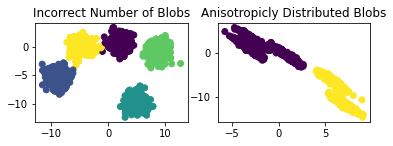

In [44]:
## import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Generate a 2D samples of certain number of blobs
random_state = 170 # You can change random state and see changes in data examples)
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=random_state)

# number of clusters!!!!!!
y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)
print(y_pred)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)

print(y_pred)

Exercise (not a priority in the class, do it if you have time): perform the above clustering task using a hierachical method.

Hint: 
- from sklearn.cluster import AgglomerativeClustering
- help(AgglomerativeClustering)
- or go to scikit-learn online document for an example. 

[3 3 0 ... 3 3 0]
[0 0 1 ... 0 0 1]
[1 1 0 ... 1 1 0]


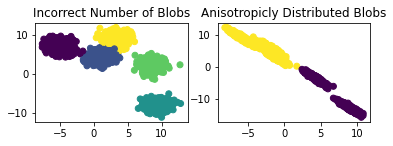

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


# Generate a 2D samples of certain number of blobs
random_state = 87 # You can change random state and see changes in data examples)
n_samples = 2000
X, y = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=random_state)

# number of clusters!!!!!!
y_pred = AgglomerativeClustering(n_clusters=5).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = AgglomerativeClustering(n_clusters=2).fit_predict(X_aniso)
print(y_pred)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_aniso)

print(y_pred)

### K-means for VQ based image compression 

K-means clustering is a well known method of vector quantisation (VQ), a key component of traditional signal processing, that is widely used for cluster analysis in machine learning. K-means clustering attempts to partition ```n``` observations into ```k``` clusters in which each observation belongs to a cluster of the nearest mean. This results in partitioning the data space into Voronoi cells.

<a title="Balu Ertl, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Euclidean_Voronoi_diagram.svg"><img width="512" alt="Euclidean Voronoi diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Euclidean_Voronoi_diagram.svg/512px-Euclidean_Voronoi_diagram.svg.png"></a>

VQ is the procedure of calculating continuous with discrete values as a method of deducing a compact representation data whilst mantaining a fair representation of the dataset. 

A working example of this can be found below. Study and modify the code to get a better understanding of the data:

Raw Image


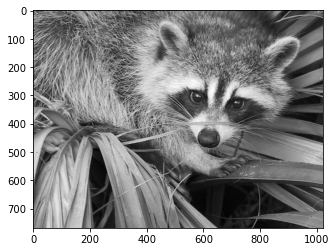

[[156.4503321 156.4503321 156.4503321 ... 156.4503321 156.4503321
  156.4503321]
 [ 65.1888449  65.1888449 156.4503321 ... 156.4503321 156.4503321
  156.4503321]
 [ 65.1888449  65.1888449  65.1888449 ... 156.4503321 156.4503321
  156.4503321]
 ...
 [ 65.1888449  65.1888449 156.4503321 ... 156.4503321 156.4503321
  156.4503321]
 [ 65.1888449  65.1888449 156.4503321 ... 156.4503321 156.4503321
  156.4503321]
 [ 65.1888449  65.1888449 156.4503321 ... 156.4503321 156.4503321
  156.4503321]]
Compressed Image


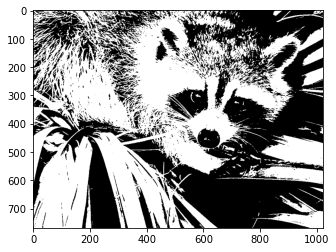

In [26]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from scipy.misc import face
photo = face(gray=True)

print("Raw Image")

plt.figure()
plt.imshow(photo, cmap=plt.cm.gray)
plt.show()

# The number of clusters we wish to deduce.
# Change this to better understand the methodology.
n_clusters = 2

# Flatten the image
# Convert from photo of shape (768, 1024)) to X of shape (N,1)
X = photo.reshape((-1, 1)) 
km = KMeans(n_clusters=n_clusters)
km.fit(X)
# Get compressed values
values = km.cluster_centers_.squeeze()
# And now the labels
labels = km.labels_

# Now, select the important features
photo_compressed = np.choose(labels, values)
photo_compressed.shape = photo.shape

print("Compressed Image")

plt.figure()
plt.imshow(photo_compressed, cmap=plt.cm.gray)
plt.show()

Question: do you know how and why clustering can be applied for image compression now? 

If not, more explanation can be found below.  

For example, to store color intensities you can quantise floating-point values in the range ```[0.0, 1.0]``` to integer values in the range ```0-255```, representing them with 8 bits, which is considered a sufficient resolution for many applications dealing with color. In this example, the spacing of possible values is the same over the entire discrete set, so we speak of uniform quantisation; often, a nonuniform spacing is more appropriate when better resolution is needed over some parts of the range of values. Floating-point number representation is an example of nonuniform quantization - you have the as many possible FP values between 0.1 and 1 as you have between 10 and 100.

Both these are examples of scalar quantisation the input **and** output values are scalars, or single numbers. By quantising each component of the vector for itself, we gain nothing over standard scalar quantisation; however, if we quantize the **entire vectors**, opting to replace them with vectors from a carefully selected sparse nonuniform set and storing just indices into that set, we can deduce a compressed representation of the image.

## Gaussian Mixture Models

A Mixture Model is a class of probability density models in which the data is assumed to be formed by a number of component distributions. Where these distributions are Guassian, then the model forms a Gaussian Mixture Model. These distributions are combined to produce a multi-modal density function, thus forming a mixture model.

You can think of mixture models as generalising *k*-means clustering to incorporate information about the covariance structure of the data as well as the centers of found latent Gaussians.

Familarise yourself with ```sklearn```'s documentation for the Gaussian Mixture model:

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

### The Expectation–Maximisation Algorithm

The more perceptive of you may have noticed the following paragraph linked in the aforementioned documentation:

> The ```GaussianMixture``` object implements the expectation-maximization (EM) algorithm for fitting mixture-of-Gaussian models. It can also draw confidence ellipsoids for multivariate models, and compute the Bayesian Information Criterion to assess the number of clusters in the data. A ```GaussianMixture.```fit method is provided that learns a Gaussian Mixture Model from ```train data```. Given ``test data```, it can assign to each sample the Gaussian it mostly probably belong to using the ```GaussianMixture.predict``` method.

A major difficuly in fitting Gaussian mixture models in an unsupervised fashion is that you may not know what points are generated from a given latent component. The Expectation-Maximisation algorithm is a well-founded method to get around this problem through recursion.

1. We assume random components (in the form of randomly centered data points learned from k-means), and compute for each point a probability of being generated by each component of the model.
2. Tweak the parameters to maximise the liklihood of the data belonging to those assignments.

This simplistic technique is almost guaranteed to converge to a local optimum. See 
https://alliance.seas.upenn.edu/~cis520/dynamic/2019/wiki/index.php?n=Lectures.EM

https://scikit-learn.org/stable/modules/mixture.html

Exercise: 


- Perform clustering using GMM on the blob or iris dataset.

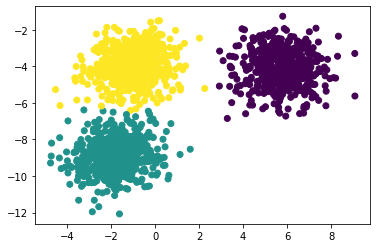

In [70]:
# Exercise on GMM for clustering 
# Your code here: 

from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate a 2D samples of certain number of blobs
random_state = 40# You can change random state and see changes in data examples)
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=3, n_features=2, random_state=random_state)

#cluster using gmm
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(X)
labs = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labs, cmap='viridis')


### Unsupervised learning for the compound data in the Kaggle challenge 

Last week we attempted to classify compounds through the use of chemical structural information. It would be also useful to perform clustering using the compound data either on the training set or test set, and examining the possible clusters of chemical compounds and their characteristics that might be linked to BBB permeability. 

What would be the main consideration if you would have to perform clustering on this dataset?


### Additional readings on how to determine the number of clusters

- https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#